# Week 4: Mathematical expectation


 #### [Back to main page](https://petrosyan.page/fall2020math3215)


### Mean value of the hypergeometric distribution

The mean value of the hypergeometric distribution with parameters $(N,K,n)$ is equal to 

$$\mu=\frac{nK}{N}.$$

As we discussed in class, the mean value was in a sense the center of the histogram: the point around which most of the histogram was concentrated. This is very vividly observed for the hypergeometric distribution. The plot bellow shows the mean value in blue for different values of $(N,K,n)$.

In [1]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb
from ipywidgets import interact, IntSlider

def hypergeometric_pmf(N=80,K=40,n=30):
    range_x = np.arange(max(0, n-(N-K)), min(n, K)+1, 1)

    def hyper_pmf(N,K,n,i):
        pmf_val = comb(K, i, exact=True) * comb(N-K, n-i, exact=True) / comb(N, n, exact=True)
        return pmf_val
    mean = n * K / N

    pmf_values = np.array([hyper_pmf(N,K,n,i) for i in range_x])

    # plot setup
    plt.figure(figsize=(14,7)) 
    plt.axhline(y=0, color='k')
    plt.ylim(-0.02, max(np.max(pmf_values)+0.05, 0.2))
    plt.xlim(-2,N+2)
    plt.xticks(np.arange(0, N+1, 5))

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(np.array([mean]),np.zeros(1), color ="blue", s=200)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color=(0.1, 0.1, 1, 0.1), edgecolor='blue', linewidth=1.3)
    plt.title("Hypergeometric distribution")
    plt.figtext(0.75,0.8, " N={} \n K={} \n n={} \n expectation={:.2f}".format(N,K,n, mean), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
N = IntSlider(min=1.0, max=100.0, step=1.0, value=80, readout_format='')
K = IntSlider(min=1.0, max=N.value, step=1.0, value=40, readout_format='')
n = IntSlider(min=1.0, max=N.value, step=1.0, value=30, readout_format='')

# enforce K<=N and n<=N
def update_range(*args):
    K.max = N.value
    n.max = N.value
N.observe(update_range, 'value')

# display the interactive plot
interact(hypergeometric_pmf, N=N, K=K, n=n);

interactive(children=(IntSlider(value=80, description='N', min=1, readout_format=''), IntSlider(value=40, desc…

### Geometric distribution

A random trial has a probability of success equal to $p$ and probability of failure $q=1-p$.Consider the following experiment: we are doing consecutive  random trials until we reach a success.The set of outcomes has the form $s=\overbrace{FF\cdots F}^{n-1} S$ where number of $F$'s can be any number $n=1,2,\dots$.  Due to independence, $P(s)=q^np$.  

Let $X(s)$ denote the number of trials it took to reach success

$$X(\overbrace{FF\cdots F}^{n-1} S)=n.$$

Observe that 

$$f(n)=q^{n-1}p,\quad n=1,2,\dots.$$




**Definition (Geometric distribution)**

<div class="alert alert-block alert-info">

The pmf of the random variable $X$ is called Geometric distribution.

</div>    

In [1]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider


def geometric_pmf(p=0.5):
    q = 1-p
    N=15
    range_x = np.arange(1, N, 1)

    def geo_pmf(n):
        pmf_val = q**(n-1)*p
        return pmf_val
    mean = 1/p

    pmf_values = np.array([geo_pmf(n) for n in range_x])

    # plot setup
    plt.figure(figsize=(10,7)) 
    plt.axhline(y=0, color='k')
    plt.ylim(0, max(np.max(pmf_values)+0.05, 0.2))
    plt.xlim(0, N+1)
    plt.xticks(np.arange(0, N+1, 5))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    #plt.scatter(np.array([mean]),np.zeros(1), color ="blue", s=200)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3)
    plt.title("Geometric distribution")
    plt.figtext(0.8,0.8, "p={}".format(p), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
p = FloatSlider(min=0.01, max=1, step=0.01, value=0.4, readout_format='')

# display the interactive plot
interact(geometric_pmf, p=p);

interactive(children=(FloatSlider(value=0.4, description='p', max=1.0, min=0.01, readout_format='', step=0.01)…

### Mean and Variance under linear transformation

**Theorem**

<div class="alert alert-block alert-info">

Suppose $X$ is a random variable with mean $\mu_X$ and standard deviation $\sigma_Y$. Let $Y=aX+b$ where $a$ and $b$ are any two numbers. Then mean and the standard deviation of $Y$ are
$$\mu_Y=a\mu_X+b,\quad \sigma_Y=|a|\sigma_X.$$

</div>    
    
**Proof**
$\mu_Y=E[aX+b]=aE[X]+b=a\mu_X+b.$ Notice that

$$\text{Var}(Y)=E[(Y-E[Y])^2]=E[(aX+b-aE[X]-b)^2]=E[(aX-aE[X])^2]=a^2\text{Var}(X).$$

Taking square roots, we have $\sigma_Y=|a|\sigma_X$. $\blacksquare$


**Example**

Let $X$ be a random variable with $\text{range}(X)=\{-2,-1,0,1,2\}$ and 

$$f_X(-2)=0.4, \quad f_X(-1)=0.25, \quad f_X(0)=0.15, \quad f_X(1)=0.1, \quad f_X(2)=0.1.$$

Take the random variable $Y=2X+1$.Notice that $\text{range}(Y)=\{-3,-1,1,3,5\}$ and 

$$_Y(-3)=0.4, \quad f_Y(-1)=0.25, \quad f_Y(1)=0.15, \quad f_Y(3)=0.1, \quad f_Y(5)=0.1.$$

It can be checked that 

$$\mu_X=-0.75, \quad \sigma_X\approx 1.414$$

and thus 

$$\mu_Y=-0.5, \quad \sigma_Y\approx 2.828.  $$

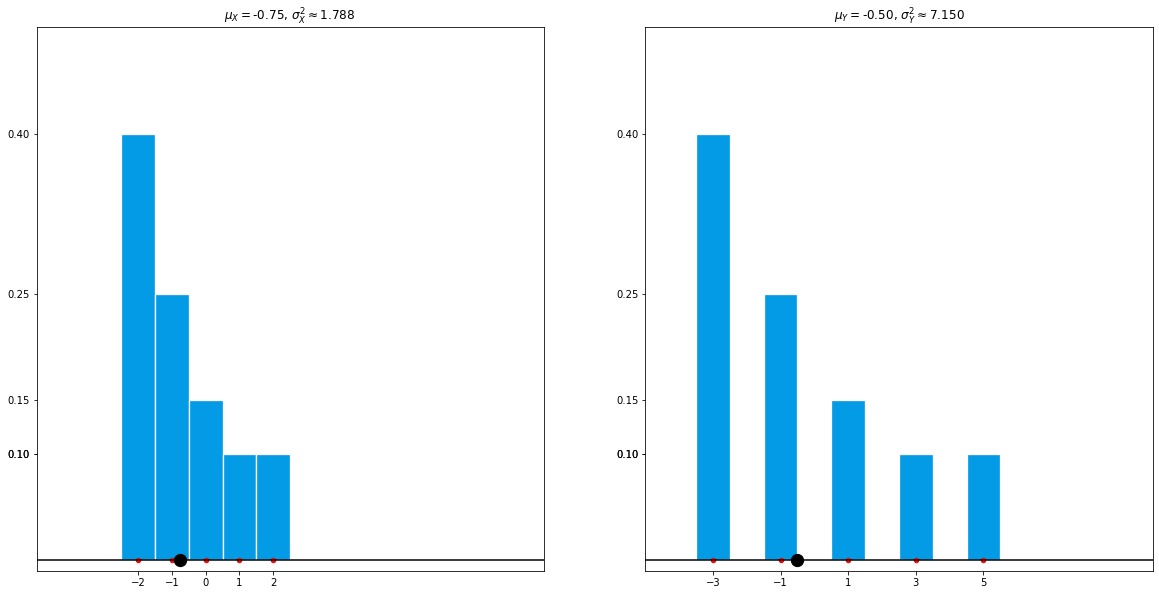

In [10]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,10)) 

# values
range_x = np.array([-2,-1,0,1,2])
range_y = np.array([-3,-1,1,3,5])
xpmf_values = np.array([0.4, 0.25, 0.15, 0.1, 0.1])
ypmf_values = np.array([0.4, 0.25, 0.15, 0.1, 0.1])

# mean  
mean_x = np.average(range_x, weights = xpmf_values)
mean_y = np.average(range_y, weights = ypmf_values)

# variance
mean_x2 = np.average(np.power(range_x,2), weights = xpmf_values)
mean_y2 = np.average(np.power(range_y,2), weights = ypmf_values)
var_x = mean_x2 - mean_x**2
var_y = mean_y2 - mean_y**2

# set up the figure
fig, [ax1, ax2] = plt.subplots(1,2, num=1, clear=True)

ax1.set_ylim(-0.01,0.5) 
ax1.set_xlim(-5, 10)
ax1.axhline(y=0, color='k')
ax1.set_xticks(range_x)
ax1.set_yticks(xpmf_values)

ax2.set_ylim(-0.01, 0.5) 
ax2.set_xlim(-5, 10)
ax2.axhline(y=0, color='k')
ax2.set_xticks(range_y)
ax2.set_yticks(ypmf_values)


# 
ax1.scatter(np.array([mean_x]),np.zeros(1), color ="black", s=150, zorder=3)
ax1.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20, zorder=2)
ax1.bar(range_x, xpmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3, zorder=1)
ax1.set_title(r"$\mu_X=${:.2f}, $\sigma^2_X\approx${:.3f}".format(mean_x, var_x))


# 
ax2.scatter(np.array([mean_y]),np.zeros(1), color ="black", s=150, zorder=3)
ax2.scatter(range_y,np.zeros(range_y.shape), color ="red", s=20, zorder=2)
ax2.bar(range_y, ypmf_values, width=1, color='#039be5', edgecolor="w", linewidth=1.3, zorder=1)
ax2.set_title(r"$\mu_Y=${:.2f}, $\sigma^2_Y\approx${:.3f}".format(mean_y, var_y))

plt.show();


### Negative binomial distribution


**Definition**

<div class="alert alert-block alert-info">

Let $X$ be the number of independent Bernoulli trials with success probability $p$ needed until exactly r successes occur. Then we say $X$ has the **negative binomial distribution** with parameters $(r,p)$.
</div>


* $\text{range}(X)=\{r,r+1,\dots\}.$
*If $X(s)=x$, means there are $r-1$ successes and $x-r$ fails in the first $x-1$ trials and the $x-th $ trial is a success. Therefore

$$f(x)={x-1\choose r-1}p^{r}q^{x-r}.$$

* When $r=1$, the negative binomial distribution is the same as the geometric distribution. 

In [166]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider


def negbinomial_pmf(r, p):
    q = 1-p
    N=100
    range_x = np.arange(r, N, 1)

    def negbin_pmf(x):
        pmf_val = comb(x-1, r-1, exact=True) * p**r * q**(x-r)
        return pmf_val
    mean = r/p

    pmf_values = np.array([negbin_pmf(x) for x in range_x])

    # plot setup
    plt.figure(figsize=(14,7)) 
    plt.axhline(y=0, color='k')
    plt.ylim(-0.02, max(np.max(pmf_values)+0.05, 0.1))
    plt.xlim(np.min(range_x)-2, N+1)

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(np.array([mean]),np.zeros(1), color ="blue", s=200)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color=(0.1, 0.1, 1, 0.1), edgecolor='blue', linewidth=1.3)
    plt.title("Negative binomial distribution")
    plt.figtext(0.8,0.8, " r={} \n p={} ".format(r,p), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
r = IntSlider(min=1, max=50, step=1, value=30, readout_format='')
p = FloatSlider(min=0.01, max=1, step=0.01, value=0.5, readout_format='')

# display the interactive plot
interact(negbinomial_pmf, r=r, p=p);

interactive(children=(IntSlider(value=30, description='r', max=50, min=1, readout_format=''), FloatSlider(valu…

### Poisson distribution


**Definition**

<div class="alert alert-block alert-info">

A discrete random variable has Poisson distribution with parameter $\lambda>0$ if 

$$\text{range}(X)=\{0,1,2,3,\dots\}$$

and 

$$f(x)=\frac{e^{-\lambda}\lambda^x}{x!},\quad x\in\text{range}(X).$$

$\lambda$ is called the **expected rate**.
</div>

 Notice that $f(x)$ is indeed a pmf:
 
$$\sum_{x\in \text{range}(X)}f(x)=\sum_{x=0}^\infty \frac{e^{-\lambda}\lambda^x}{x!}=e^{-\lambda} \sum_{x=0}^\infty \frac{\lambda^x}{x!}=e^{-\lambda}e^{\lambda}=1.$$


In [6]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial
from ipywidgets import interact, FloatSlider


def poisson_pmf(lam):
    N=50
    range_x = np.arange(0, N, 1)

    def poiss_pmf(x):
        pmf_val = np.exp(-lam) * np.power(lam, x) / factorial(x)
        return pmf_val
    mean = lam

    pmf_values = np.array([poiss_pmf(x) for x in range_x])

    # plot setup
    plt.figure(figsize=(14,7)) 
    plt.axhline(y=0, color='k')
    plt.ylim(-0.02, max(np.max(pmf_values)+0.05, 0.1))
    plt.xlim(0, N+1)
    plt.xticks(np.arange(0, N+1, 5))

    # PLotting with plt.bar instead of plt.hist works better when f(x) are knowwn
    plt.scatter(np.array([mean]),np.zeros(1), color ="blue", s=200)
    plt.scatter(range_x,np.zeros(range_x.shape), color ="red", s=20)
    plt.bar(range_x, pmf_values, width=1, color=(0.1, 0.1, 1, 0.1), edgecolor='blue', linewidth=1.3)
    plt.title("Poisson distribution")
    plt.figtext(0.8,0.8, r"$\lambda$={}".format(lam), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.plot();

# create interactive variables
lam = FloatSlider(min=0.0, max=100, step=0.5, value=30, readout_format='', description=r"$\lambda$")

# display the interactive plot
interact(poisson_pmf, lam=lam);

interactive(children=(FloatSlider(value=30.0, description='$\\lambda$', readout_format='', step=0.5), Output()…

#### Motivation 

The Poisson distribution arises in the following way (made up scenario): grocery route bus can arrive every $\frac{1}{n}$ hour. It is a very unpredictable bus but we know that there are on average $\lambda$ buses arriving every hour. Assuming whether a bus arrives or not at given time  is independent from  other times, this becomes a binomial distribution with parameter $p=\frac{\lambda}{n}$. We know that the expect number of successes in a binomial distribution with parameters $(n,p)$ is $np$ and so $p=\frac{\lambda}{n}$. Therefore, the probability of $x$ number of buses arriving in an hour will be

$$f(x)={n\choose x}p^x(1-p)^{n-x}={n\choose x}\left(\frac{\lambda}{n}\right)^x\left(1-\frac{\lambda}{n}\right)^{n-x},\quad x=0,1,2,\dots, n. $$

* Now imagine the bus starts arriving at more irregular times. To accommodate that we can increase the $n$. 
* When $n\to \infty$ that will correspond to the buses potentially arriving at any moment in the continuous interval. 
* In that case

$$f(x)=\lim_{n\to \infty}{n\choose x}\left(\frac{\lambda}{n}\right)^x\left(1-\frac{\lambda}{n}\right)^{n-x}, \quad x=0,1,2,\dots.$$

To compute this limit notice that 

$$\lim_{n\to \infty}{n\choose x}\left(\frac{\lambda}{n}\right)^x=\frac{\lambda^x}{x!}\lim_{n\to \infty}\frac{n(n-1)\cdots (n-x+1)}{•n^x}=\frac{\lambda^x}{x!}$$

and (you should know this from calculus)

$$\lim_{n\to \infty}\left(1-\frac{\lambda}{n}\right)^{n-x}=e^{-\lambda}.$$

Consequently, if the buses can potentially arrive any moment within the hour, with $\lambda$ buses arriving in average  at every hour, then the probability that $x$ buses will arrive in a given hour is 
$$f(x)=\frac{e^{-\lambda}\lambda^x}{x!},\quad x=0,1,2,\dots.$$



In [1]:
# nbi:hide_in
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb, factorial
from ipywidgets import interact, IntSlider, FloatSlider

def poiss_binom_pmf(n, lam):
    p = lam/n
    q = 1-p
    N = 50
    brange_x = np.arange(0, n, 1)
    prange_x = np.arange(0, N, 1)

    def poiss_pmf(x):
        pmf_val = np.exp(-lam) * np.power(lam, x) / factorial(x)
        return pmf_val
    mean = lam

    ppmf_values = np.array([poiss_pmf(x) for x in prange_x])
    
    def binom_pmf(x):
        pmf_val = comb(n, x, exact=True) * p**x * q**(n-x)
        return pmf_val
    mean = n*p

    bpmf_values = np.array([binom_pmf(x) for x in brange_x])

    # plot setup
    plt.figure(figsize=(14,7)) 
    plt.axhline(y=0, color='k')
    plt.xlim(-2,20)

    # Plotting hypergeometric
    plt.bar(prange_x, ppmf_values, width=1, color=(0.1, 0.1, 1, 0.1), edgecolor='blue', 
            linewidth=1.3, label="Poisson")
    
    # Plotting binomial
    plt.bar(brange_x, bpmf_values, width=1, color=(0.3, 0.5, 0.3, 0.1), edgecolor='green',
            linewidth=1.3, label="Binomial")
    plt.figtext(0.83,0.75, r" $\lambda$={}".format(lam)+"\n n = {}".format(n), ha="left", va="top",
            backgroundcolor=(0.1, 0.1, 1, 0.15), fontsize="large")
    plt.legend()
    plt.plot();

# create interactive variables
lam = FloatSlider(min=0.0, max=100, step=0.5, value=5, readout_format='', description=r"$\lambda$")
n = IntSlider(min=np.floor(lam.value)+1, max=200, step=1, value=100, readout_format='')

# enforce K<=N and n<=N
def update_range(*args):
    n.min = np.floor(lam.value)+1
    
lam.observe(update_range, 'value')

# display the interactive plot
interact(poiss_binom_pmf,  lam=lam, n=n);

interactive(children=(IntSlider(value=100, description='n', max=200, min=6, readout_format=''), FloatSlider(va…

Let us see that the Poisson distribution with parameter $\lambda$ and the binomial distribution with parameters $(n,p=\frac{\lambda}{n})$ are close to each other  when $n$ is large by looking at their histograms.
